# 4章 ニューラルネットの学習

## 4.2 損失関数

### 4.2.1 2乗誤差

In [1]:
function meansquarederror(y::Vector, t::Vector)
    0.5 * sum((y-t).^2)
end

meansquarederror (generic function with 1 method)

In [2]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

10-element Array{Int64,1}:
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0

In [3]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
meansquarederror(y, t)

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
meansquarederror(y, t)

0.5974999999999999

### 4.2.2 交差エントロピー誤差

In [5]:
function crossentropyerror(y::Vector, t::Vector)
    δ = 1e-7
    # -sum(t .* log(y .+ δ))
    -(t ⋅ log(y .+ δ))
end

crossentropyerror (generic function with 1 method)

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

10-element Array{Int64,1}:
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0

In [7]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
crossentropyerror(y, t)

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
crossentropyerror(y, t)

2.302584092994546

### 4.2.3 ミニバッチ学習

In [9]:
using MNIST

In [10]:
x_train, t_train = traindata();
x_test, t_test = testdata();

In [11]:
size(x_train)

(784,60000)

In [12]:
size(t_train)

(60000,)

※書籍に合わせて、x_train を正規化、t_train を one_hot_vector 化しておく。

In [13]:
x_train ./= 255.0

784×60000 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [14]:
function onehot(t::AbstractVector, l::AbstractVector)
    r = zeros(Int, length(l), length(t))
    for i = 1:length(t)
        r[findfirst(l, t[i]), i] = 1
    end
    r
end

onehot (generic function with 1 method)

In [15]:
t_train = onehot(t_train, 0:9)

10×60000 Array{Int64,2}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  0  1  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  1  0  1     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  0  …  0  0  0  0  0  1  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  1  0  0  0  0  0  1  0  0  0  1
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  1  0  1  0  0  0  0  0  0  0

In [16]:
# train_size = size(x_train)[2] 
train_size = size(x_train, 2)

60000

In [17]:
batch_size = 10

10

In [18]:
batch_mask = rand(1:train_size, batch_size)

10-element Array{Int64,1}:
 51735
 10003
 21993
  8797
 17117
 50249
 50154
  9443
  8222
 34718

In [19]:
x_batch = x_train[:, batch_mask]

784×10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                      
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0 

In [20]:
t_batch = t_train[:, batch_mask]

10×10 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  1
 0  0  0  0  1  0  0  0  0  0
 0  0  1  1  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  1  0  0  0  0

### 4.2.4 [バッチ対応版] 交差エントロピー誤差の実装

In [21]:
function crossentropyerror(y::Matrix, t::Matrix)
    batch_size = size(y, 2)
    δ = 1e-7
    -sum(t .* log(y .+ δ)) / batch_size
end

crossentropyerror (generic function with 2 methods)

In [22]:
A = [1 2 3;4 5 6;7 8 9]
# A[[2,3,1],[1,2,3]]
mapslices(i->v[])

LoadError: LoadError: MethodError: no method matching mapslices(::##1#2)
Closest candidates are:
  mapslices(::Any, !Matched::AbstractArray{T,N}, !Matched::AbstractArray{T,1}) at abstractarray.jl:1606
  mapslices(::Any, !Matched::AbstractArray{T,N}, !Matched::Any) at abstractarray.jl:1604
while loading In[22], in expression starting on line 3

In [23]:
function crossentropyerror(y::Matrix, t::Vector)
    batch_size = size(y, 2)
    δ = 1e-7
    -sum(log([y[t[i]+1, i] for i=1:batch_size] .+ δ)) / batch_size
end

crossentropyerror (generic function with 3 methods)

## 4.3 数値微分

### 4.3.1 微分

In [24]:
function numericaldiff(f, x)
    h = 1e-4 # 0.0001
    (f(x+h) - f(x-h)) / 2h
end

numericaldiff (generic function with 1 method)

### 4.3.2 数値微分の例

In [25]:
function_1(x) = 0.01x.^2 + 0.1x

function_1 (generic function with 1 method)

In [26]:
using Gadfly

In [27]:
x = 0.0:0.1:20.0

0.0:0.1:20.0

In [28]:
y = function_1(x)

201-element Array{Float64,1}:
 0.0   
 0.0101
 0.0204
 0.0309
 0.0416
 0.0525
 0.0636
 0.0749
 0.0864
 0.0981
 0.11  
 0.1221
 0.1344
 ⋮     
 5.4621
 5.51  
 5.5581
 5.6064
 5.6549
 5.7036
 5.7525
 5.8016
 5.8509
 5.9004
 5.9501
 6.0   

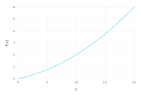

In [29]:
plot(x=x, y=y, Guide.xlabel("x"), Guide.ylabel("f(x)"), Geom.line)

In [30]:
numericaldiff(function_1, 5)

0.1999999999990898

In [31]:
numericaldiff(function_1, 10)

0.2999999999986347

In [32]:
function tangent_line(f, x)
    d = numericaldiff(f, x)
    # print(d)
    y = f(x) - d*x
    return t -> d*t + y
end

tangent_line (generic function with 1 method)

In [33]:
using Compose

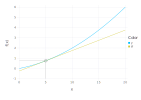

In [34]:
tl = tangent_line(function_1, 5)
plot(
layer(x=vcat(x, x), y=vcat(y, tl(x)), color=vcat(repmat(["y"], length(x)), repmat(["tf"], length(x))), Geom.line),
layer(x=[5.0,0.0], y=[-1.0,0.75], xend=[5.0,5.0], yend=[0.75,0.75], Geom.segment, 
Theme(default_color=colorant"gray", line_width=0.5px)),
Guide.xlabel("x"), Guide.ylabel("f(x)"), 
Guide.annotation(compose(context(), circle([5.0], [0.75], [5px]), fill(nothing),stroke(colorant"gray"))),
Coord.cartesian(xmin=0.0, xmax=20.0, ymin=-1.0, ymax=6.0))

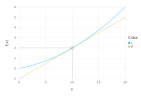

In [35]:
tl = tangent_line(function_1, 10)
plot(
layer(x=vcat(x, x), y=vcat(y, tl(x)), color=vcat(repmat(["y"], length(x)), repmat(["tf"], length(x))), Geom.line),
layer(x=[10.0,0.0], y=[-1.0,2.0], xend=[10.0,10.0], yend=[2.0,2.0], Geom.segment, 
Theme(default_color=colorant"gray", line_width=0.5px)),
Guide.xlabel("x"), Guide.ylabel("f(x)"), 
Guide.annotation(compose(context(), circle([10.0], [2.0], [5px]), fill(nothing),stroke(colorant"gray"))),
Coord.cartesian(xmin=0.0, xmax=20.0, ymin=-1.0, ymax=6.0))

### 4.3.3 偏微分

In [36]:
function partial_diff(f, x1, x2)
    (numericaldiff(x->f(x, x2), x1), numericaldiff(x->f(x1, x), x2))
end

partial_diff (generic function with 1 method)

In [37]:
function_2(x1, x2) = x1.^2 + x2.^2

function_2 (generic function with 1 method)

In [38]:
partial_diff(function_2, 3.0, 4.0)

(6.00000000000378,7.999999999999119)

## 4.4 勾配

In [39]:
function numerical_gradient(f, x::Vector)
    h = 1e-4 # 0.0001
    # (f(x+h) - f(x-h)) / 2h
    map(1:length(x)) do idx
        tmp_val = x[idx]
        # f(x+h)
        x[idx] += h
        fxh1 = f(x)
        # f(x-h)
        x[idx] -= 2h
        fxh2 = f(x)
        # restore
        x[idx] = tmp_val
        (fxh1 - fxh2) / 2h
    end
end

numerical_gradient (generic function with 1 method)

In [40]:
function numerical_gradient{T,N}(f, x::AbstractArray{T,N})
    h = 1e-4 # 0.0001
    # (f(x+h) - f(x-h)) / 2h
    reshape(map(1:length(x)) do idx
        tmp_val = x[idx]
        # f(x+h)
        x[idx] += h
        fxh1 = f(x)
        # f(x-h)
        x[idx] -= 2h
        fxh2 = f(x)
        # restore
        x[idx] = tmp_val
        (fxh1 - fxh2) / 2h
    end, size(x))
end

numerical_gradient (generic function with 2 methods)

In [41]:
function_2(x::Vector) = x ⋅ x

function_2 (generic function with 2 methods)

In [42]:
numerical_gradient(function_2, [3.0, 4.0])

2-element Array{Float64,1}:
 6.0
 8.0

In [43]:
numerical_gradient(function_2, [0.0, 2.0])

2-element Array{Float64,1}:
 0.0
 4.0

In [44]:
numerical_gradient(function_2, [3.0, 0.0])

2-element Array{Float64,1}:
 6.0
 0.0

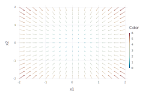

In [45]:
a0 = [-2.0:0.25:2.0;]
x = vec(repeat(a0,outer=(1,17)))
y = vec(repeat(a0',outer=(17,1)))
gxy = mapslices(v->numerical_gradient(function_2, v), [x y;], 2)
exy = [x y;] - gxy ./ 5maximum(gxy)
c = mapslices(norm, gxy, 2)
plot(
x=x, y=y, xend=exy[:,1], yend=exy[:,2], color=c, Geom.vector, 
Guide.xlabel("x1"), Guide.ylabel("x2"), 
Scale.x_continuous(minvalue=-2.0, maxvalue=2.0),
Scale.y_continuous(minvalue=-2.0, maxvalue=2.0),
Coord.cartesian(xmin=-2.0, xmax=2.0, ymin=-2.0, ymax=2.0))

### 4.4.1 勾配法

In [46]:
function gradient_descent(f, init_x; lr=0.01, step_num=100)
    x = init_x
    
    for i = 1:step_num
        grad = numerical_gradient(f, x)
        x -= lr * grad
    end
    
    x
end

gradient_descent (generic function with 1 method)

In [47]:
init_x = [-3.0, 4.0]
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

2-element Array{Float64,1}:
 -6.11111e-10
  8.14814e-10

In [48]:
init_x = [-3.0, 4.0]
gradient_descent(function_2, init_x, lr=10.0, step_num=100)

2-element Array{Float64,1}:
 9.45376e11
 2.56007e13

In [49]:
init_x = [-3.0, 4.0]
gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

2-element Array{Float64,1}:
 -3.0
  4.0

### 4.4.2 ニューラルネットワークに対する勾配

In [50]:
# from Chapter3
function softmax{T<:AbstractFloat}(a::AbstractVector{T})
    c = maximum(a)  # オーバーフロー対策
    exp_a = exp(a .- c)
    sum_exp_a = sum(exp_a)
    exp_a ./ sum_exp_a
end

function softmax{T<:AbstractFloat}(a::AbstractMatrix{T})
    mapslices(softmax, a, 1)
end

softmax (generic function with 2 methods)

In [51]:
type SimpleNet{T<:AbstractFloat}
    W::AbstractMatrix{T}
    # SimpleNet{T}() = new(randn(T, 3, 2))
end

In [52]:
(::Type{SimpleNet{T}}){T}() = SimpleNet(randn(T, 3, 2))

In [53]:
function predict{T}(net::SimpleNet{T}, x)
    net.W * x
end

predict (generic function with 1 method)

In [54]:
function loss{T}(net::SimpleNet{T}, x, t)
    z = predict(net, x)
    y = softmax(z)
    crossentropyerror(y, t)
end

loss (generic function with 1 method)

In [55]:
net = SimpleNet{Float64}()

SimpleNet{Float64}([-0.0614458 -0.421197; 0.690528 0.153866; -0.559171 -0.174646])

In [56]:
x = [0.6, 0.9]

2-element Array{Float64,1}:
 0.6
 0.9

In [57]:
p = predict(net, x)

3-element Array{Float64,1}:
 -0.415944
  0.552796
 -0.492684

In [58]:
indmax(p)

2

In [59]:
t = [0, 0, 1]

3-element Array{Int64,1}:
 0
 0
 1

In [60]:
loss(net, x, t)

1.594227218383832

In [61]:
f(W) = loss(SimpleNet(W), x, t)
dW = numerical_gradient(f, net.W)

3×2 Array{Float64,2}:
  0.131557   0.197336
  0.346604   0.519905
 -0.478161  -0.717241

※↑書籍に載っているサンプルを参照等価性とか色々気をつけて丁寧に書き直したもの。  
　↓でも動作するが、「オブジェクト内部の配列を外部から修正し処理させる」という感じの副作用を期待したコードで分かりにくくバグの温床。  

In [62]:
f0(W) = loss(net, x, t)
dW = numerical_gradient(f0, net.W)

3×2 Array{Float64,2}:
  0.131557   0.197336
  0.346604   0.519905
 -0.478161  -0.717241

## 4.5 学習アルゴリズムの実装

※ 省略（第5章の方で実装してみた）